## Regresión líneal con statsmodel
https://www.statsmodels.org/stable/index.html

In [48]:
import statsmodels.api as sm
import pyreadstat as pr
import matplotlib.pyplot as plt

In [9]:
#!pip install pyreadstat

In [39]:
arc = '../datasets/compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.head()

,salario,noasiat,gpa,postgrad,experien
0,99026.0,0.0,3.36,0.0,15.0
1,69190.0,1.0,2.35,1.0,9.0
2,95453.0,1.0,3.33,1.0,10.0
3,57695.0,1.0,3.37,0.0,2.0
4,94364.0,1.0,3.87,1.0,4.0


In [42]:
df.describe()

,salario,noasiat,gpa,postgrad,experien
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,85256.518182,0.509091,3.001455,0.645455,9.909091
std,16419.359283,0.502205,0.524191,0.480565,4.815010
min,47279.000000,0.000000,1.860000,0.000000,1.000000
25%,74379.000000,0.000000,2.650000,0.000000,6.000000
50%,86384.000000,1.000000,2.935000,1.000000,10.000000
75%,96827.250000,1.000000,3.367500,1.000000,14.000000
max,118683.000000,1.000000,4.000000,1.000000,20.000000


In [17]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [30]:
y = df['salario']
X = df.drop(['salario', 'noasiat','postgrad'], axis=1)
X

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
...,...,...
105,3.12,2.0
106,3.36,5.0
107,2.51,3.0
108,2.89,8.0


In [33]:
# Ordinary List Squares
# Y = Salario x = gpa (promedio en su carrera) y experiencia
reg_lin = sm.OLS( y , sm.add_constant(X) ).fit()
reg_lin.summary()
# R squared es una medida de desempeño
# Se usan dos variables perdiendo un
# Función e hipótesis 0 t tiene relación con el F-estádistico indica que la variable es significativa 
# y permite explicar a y

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           7.37e-38
Time:                        12:59:36   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.253   -3606.328    1.35e+04
gpa         2.024e+04   1364.423     14.831      0.000    1.75e+04    2.29e+04
experien    1973.1918    148.539     13.284      0.000    1678.730    2267.653
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.857
Skew:                          -0.191   Prob(JB):                        0.651
Kurtosis:                       2.795   Cond. No.                         72.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Tomando en cuenta los errores o los residuos

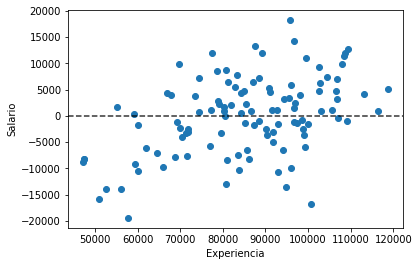

In [32]:
fig, ax = plt.subplots()

# Predice y tomando a x
y_pred = reg_lin.predict(sm.add_constant(X))
ax.scatter(y,y-y_pred)
plt.ylabel('Salario')
plt.xlabel('Experiencia')
plt.axhline(y=0, color='black', alpha=0.8, linestyle='--')